# The first part of the assignment, IDS 2020-2021
In this Jupiter notebook, please, document your results and the way you have obtained them. Please use the _Python environment_ provided at the beginning of the course. In addition to the _Jupiter notebook_, please submit _one zip-file_ containing all datasets and other outputs you have generated (such as pdf, jpg, and others). Please make sure that the datasets and other outputs are easily identifiable, i.e. use names as requested in the corresponding question.

This is the _only_ submission that is required (Jupiter notebook + zip-file). A separate report is _not_ needed and will not be considered for grading. 

Give your commented Python code and answers in the corresponding provided cells. Make sure to answer all questions in a clear and explicit manner and discuss your outputs. _Please do not change the general structure of this notebook_. You can, however, add additional markdown or code cells if necessary. <b>Please DO NOT CLEAR THE OUTPUT of the notebook you are submitting! </b>

<font color="red"> *Please make sure to include names and matriculation numbers of all group members in the slot provided below.* </font> If a name or a student id is missing, the student will not receive any points.

Hint 1: While working on the assignment, you will get a better understanding of the dataset. Feel free to generate additional results and visualizations to support your answers. For example, this might be useful regarding data modification and simplification. <font color="red">Ensure that all your claims are supported.</font>

Hint 2: <font color="red">Plan your time wisely. </font> A few parts of this assignment might take some time to run. It might be necessary to consider time management when you plan your group work.

Hint 3: RWTHmoodle allows multiple submissions, with every new submission overwriting the previous one. <b>Partial submissions are therefore possible and encouraged. </b> This might be helpful in case of technical issues with RWTHMoodle, which may occur close to the deadline.


## Preprocessing of the Dataset (5 points)
 Carry out the following preprocessing steps before starting the analysis:
 - Select 90% of dataset provided for this assignment by random sampling.
     - Use one of the group member's student numbers as a seed.
     - Rename the new generated dataset (which contains 90% of the data) to "sampled_data".
 - <font color='red'>Important!</font>  Export your *sampled_data* dataset and submit it with your assignment solution.
 - If it is not otherwise mentioned, you should always use your below created *sampled_data* as input for the questions.

In [2]:
# Your code
# finished
import random
import pandas as pd

oldf = open("dataset.csv")
rowNum = len(oldf.readlines())-1 #exclude header
oldf.close()
newRowNum = int(rowNum*0.9) #Select 90%
print ("Row Number is ", rowNum,", New Row Number is ", newRowNum)

random.seed(123456) #Use one of the group member's student numbers as a seed
skip = sorted(random.sample(range(1, rowNum + 1), rowNum - newRowNum))
newf = pd.read_csv("dataset.csv", skiprows=skip)
newf.to_csv("sampled_data.csv", index=False)

Row Number is  189 , New Row Number is  170


## Question 1 - Insights into the Data (15 points):

   (a)  Generate a dataset by removing those rows of the sampled_data dataset for which the value of "SurfaceR" is equal or bigger than 50000. Let's call this data set "new_sampled_data".

In [3]:
# Your code
# finished
df = pd.read_csv("sampled_data.csv", header=0)
df[(df['SurfaceR'] < 50000)].to_csv("new_sampled_data.csv", index=False)

   (b)  Use a boxplot to find and remove the outliers from "SurfaceR". Note that based on the boxplot the values greater than the upper-whisker and lower than the lower-whisker are considered as outliers. Let's call the dataset after removing the outliers "cleaned_data". Now you should  have three datasets (sampled_data, new_sampled_data, and cleaned_data). 

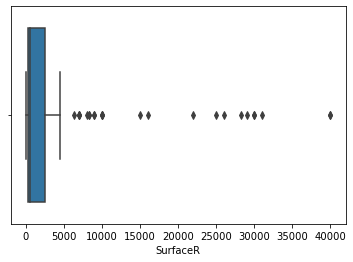

In [4]:
# Your code
# finished
import seaborn as sns
df = pd.read_csv("new_sampled_data.csv", header=0)
ax = sns.boxplot(x=df['SurfaceR'])
Q1 = df['SurfaceR'].quantile(0.25)
Q3 = df['SurfaceR'].quantile(0.75)
IQR = Q3 - Q1
filter = (df['SurfaceR'] >= Q1 - 1.5 * IQR) & (df['SurfaceR'] <= Q3 + 1.5 *IQR)
df.loc[filter].to_csv("cleaned_data.csv", index=False)

   (c) Compare basic statistical features of "SurfaceR" (median, mean, and mode, standard deviation, variance) in the new_sampled_data and cleaned_data datasets.    Interpret the differences for these statistical values between the cleaned_data and new_sampled_data datasets. Explain why the statistics of these two datasets are different.

In [1]:
# Your code
# finished
# median, mean, mode, standard deviation, variance
import statistics
import pandas as pd
from tabulate import tabulate
SurfaceR_new_sampled_data = pd.read_csv("new_sampled_data.csv", header=0)['SurfaceR']
SurfaceR_cleaned_data = pd.read_csv("cleaned_data.csv", header=0)['SurfaceR']
print (tabulate([['Median', statistics.median(SurfaceR_new_sampled_data), statistics.median(SurfaceR_cleaned_data)], 
                 ['Mean', statistics.mean(SurfaceR_new_sampled_data), statistics.mean(SurfaceR_cleaned_data)],
                 ['Mode',statistics.mode(SurfaceR_new_sampled_data), statistics.mode(SurfaceR_cleaned_data)],
                 ['Standard deviation', statistics.stdev(SurfaceR_new_sampled_data), statistics.stdev(SurfaceR_cleaned_data)],
                 ['Variance',statistics.variance(SurfaceR_new_sampled_data),statistics.variance(SurfaceR_cleaned_data)]],
                headers=['', 'new_sampled', 'cleaned'], tablefmt='orgtbl', numalign="left", floatfmt=".2f"))

|                    | new_sampled   | cleaned    |
|--------------------+---------------+------------|
| Median             | 600.00        | 425.00     |
| Mean               | 3490.84       | 1037.18    |
| Mode               | 300.00        | 300.00     |
| Standard deviation | 7400.46       | 1151.97    |
| Variance           | 54766845.35   | 1327035.98 |


In [ ]:
# Your code if needed
# finished
# the output:
# |                    | new_sampled   | cleaned    |
# |--------------------+---------------+------------|
# | Median             | 600.00        | 425.00     |
# | Mean               | 3490.84       | 1037.18    |
# | Mode               | 300.00        | 300.00     |
# | Standard deviation | 7400.46       | 1151.97    |
# | Variance           | 54766845.35   | 1327035.98 |

Explanation: The outliers are removed (mostly big numbers, as it is shown in the boxplot) so median and mean are smaller; Mode won't get affacted by the loss of some minority; Because the outliers are those far away from mean, after cleaning, the Standard deviation and Variance will be much smaller.

### Basic Visualization (10 points)
(d) Visualize mean and median of "SurfaceR" in the cleaned dataset. Specify the "Surroundings3" values for which the mean and median of "SurfaceR" is maximal and for which it is minimal.

Median of SurfaceR in total: 425.0
Mean of SurfaceR in total: 1037.1830985915492


|        | SurfaceR   |
|--------+------------|
| Median | 425.00     |
| Mean   | 1037.18    |


Median according to Surroundings3:
Surroundings3
a     300.0
b     625.0
d     200.0
e     375.0
f     750.0
g    1000.0
h     400.0
Name: SurfaceR, dtype: float64


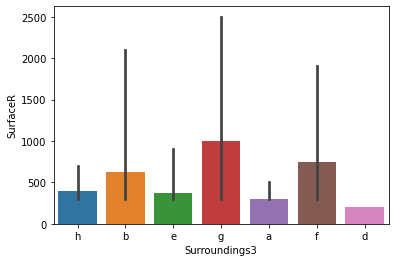



Mean according to Surroundings3:
Surroundings3
a     745.454545
b    1570.454545
d     200.000000
e     913.250000
f    1120.000000
g    1560.000000
h     886.486486
Name: SurfaceR, dtype: float64


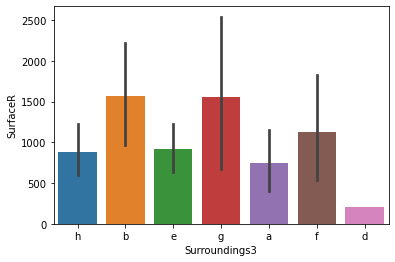


 For Median, g is max, d is min; For Mean, b is max, d is min.


In [2]:
# Your code
# finished
import pandas as pd
import seaborn as sns
import numpy as np
from numpy import median
from numpy import mean
import statistics
import matplotlib.pyplot as plt
from tabulate import tabulate

df = pd.read_csv("cleaned_data.csv", header=0)
SurfaceR_cleaned_data = df['SurfaceR']
print ("Median of SurfaceR in total:", statistics.median(SurfaceR_cleaned_data))
print ("Mean of SurfaceR in total:", statistics.mean(SurfaceR_cleaned_data))
print('\n')

print (tabulate([['Median', statistics.median(SurfaceR_cleaned_data)], 
                 ['Mean', statistics.mean(SurfaceR_cleaned_data)]],
                headers=['', 'SurfaceR'], tablefmt='orgtbl', numalign="left", floatfmt=".2f"))
print('\n')

print ("Median according to Surroundings3:")
sns.barplot(x="Surroundings3", y="SurfaceR", data=df, estimator=median)
m = df.groupby(['Surroundings3'])['SurfaceR'].apply(np.median)
print(m)
plt.show()
print('\n')

print ("Mean according to Surroundings3:")
sns.barplot(x="Surroundings3", y="SurfaceR", data=df, estimator=mean)
m = df.groupby(['Surroundings3'])['SurfaceR'].apply(np.mean)
print(m)
plt.show()

print('\n For Median, g is max, d is min; For Mean, b is max, d is min.')

Explanation: As is shown in the graghs, for Median, g is max, d is min; for Mean, b is max, d is min.

   (e) Plot the distribution of "SurfaceR" in the new_sampled_data and cleaned_data datasets.

new_sampled_data:


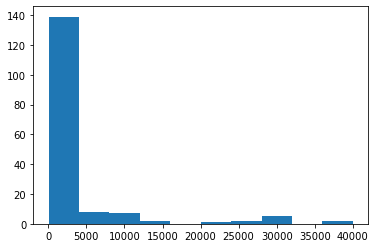

cleaned_data:


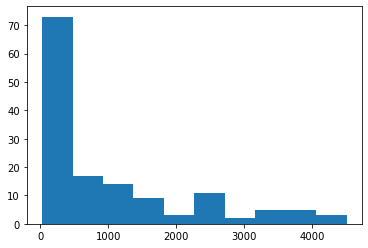

In [3]:
# Your code
# finished
import matplotlib.pyplot as plt
print ("new_sampled_data:")
plt.hist(SurfaceR_new_sampled_data)
plt.show()
print ("cleaned_data:")
plt.hist(SurfaceR_cleaned_data)
plt.show()

   (f) Explore the distribution of "SurfaceR" and "AcessR" together in the new_sampled_data and cleaned_data datasets. Specify the ranges of "SurfaceR" and "AcessR" for which the frequency of the data is the highest.

new_sampled_data, SurfaceR, highest frequency:  300


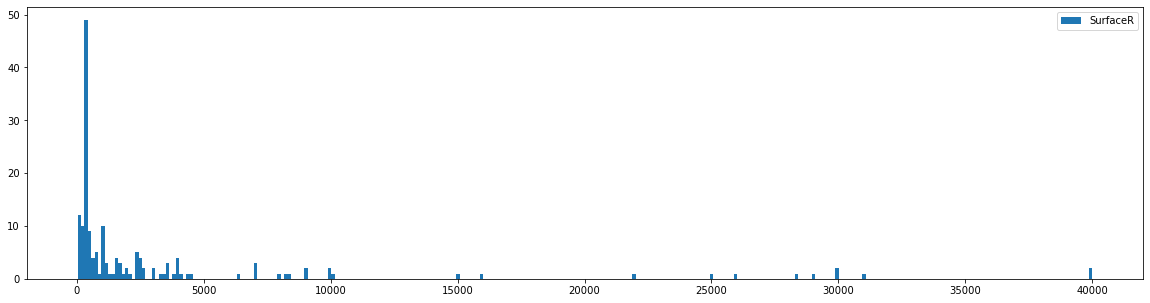

new_sampled_data, AcessR, highest frequency:  100


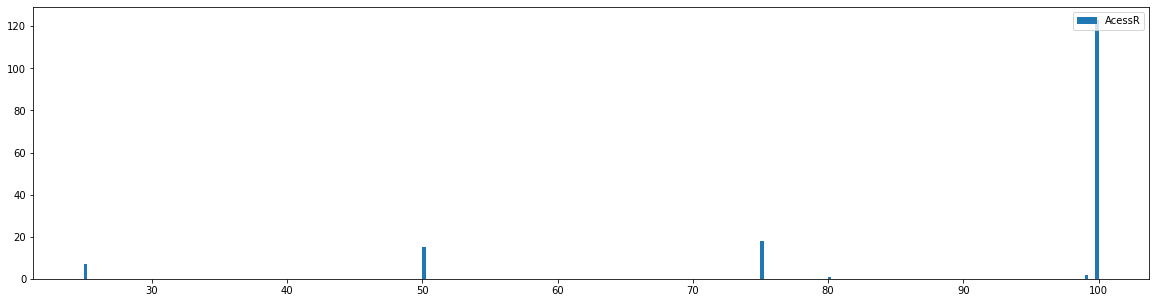

new_sampled_data SurfaceR together: 


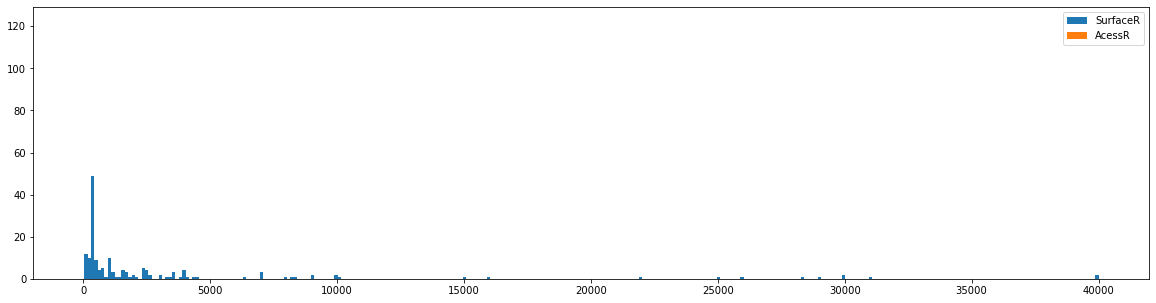

cleaned_data, SurfaceR, highest frequency:  300


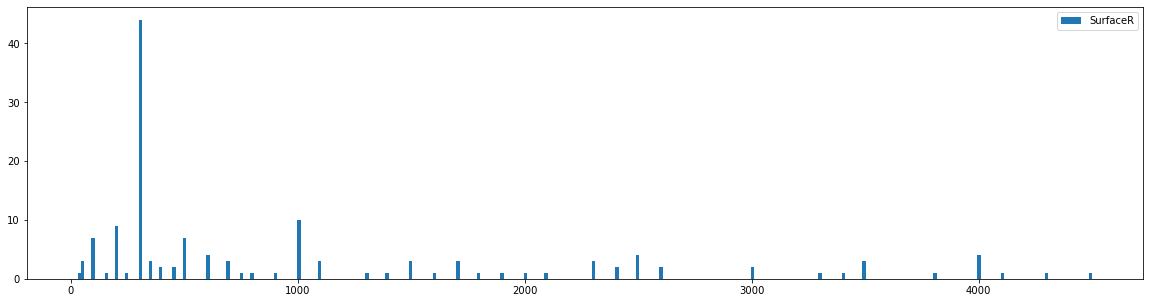

cleaned_data, AcessR, highest frequency:  100


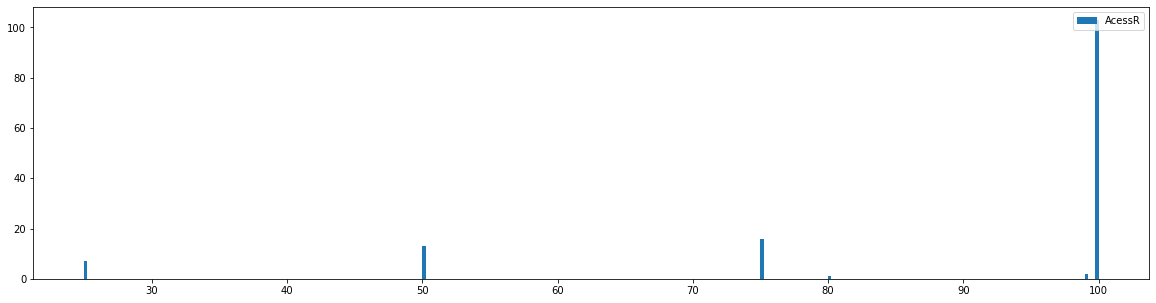

In [4]:
# Your code
# finished
import statistics
binNum = 300

print('new_sampled_data, SurfaceR, highest frequency: ', statistics.mode(SurfaceR_new_sampled_data))
plt.figure(figsize=[20,5])
plt.hist(SurfaceR_new_sampled_data, binNum, label='SurfaceR')
plt.legend(loc='upper right')
plt.show()

AcessR_new_sampled_data = pd.read_csv("new_sampled_data.csv", header=0)['AcessR']
print('new_sampled_data, AcessR, highest frequency: ', statistics.mode(AcessR_new_sampled_data))
plt.figure(figsize=[20,5])
plt.hist(AcessR_new_sampled_data, binNum, label='AcessR')
plt.legend(loc='upper right')
plt.show()

print('new_sampled_data SurfaceR together: ')
plt.figure(figsize=[20,5])
plt.hist(SurfaceR_new_sampled_data, binNum, label='SurfaceR')
plt.hist(AcessR_new_sampled_data, binNum, label='AcessR')
plt.legend(loc='upper right')
plt.show()

print('cleaned_data, SurfaceR, highest frequency: ', statistics.mode(SurfaceR_cleaned_data))
plt.figure(figsize=[20,5])
plt.hist(SurfaceR_cleaned_data, binNum, label='SurfaceR')
plt.legend(loc='upper right')
plt.show()

AcessR_cleaned_data = pd.read_csv("cleaned_data.csv", header=0)['AcessR']
print('cleaned_data, AcessR, highest frequency: ', statistics.mode(AcessR_cleaned_data))
plt.figure(figsize=[20,5])
plt.hist(AcessR_cleaned_data, binNum, label='AcessR')
plt.legend(loc='upper right')
plt.show()

Explanation:

For both datasets, the highest frequency happens when AcessR=100 and SurfaceR=300.

## Question 2 - Decision Trees (15 points):

   (a) Add a categorical column "number_frogs" to the new_sampled_data which indicate the number of different frogs in each region (row). For example, if in a row we have:
       - "Green frogs" = 1, "Brown frogs" = 1, "Common toad" = 0, "Fire-bellied toad" = 0, "Tree frog" = 0, "Common newt" = 0, and "Great crested newt" = 0, then "number_frogs" = 'two'.
       - "Green frogs" = 1, "Brown frogs" = 1, "Common toad" = 0, "Fire-bellied toad" = 0, "Tree frog" = 1, "Common newt" = 1, and "Great crested newt" = 0, then "number_frogs" = 'four'.

In [51]:
# Your code
# finished
from num2words import num2words
df = pd.read_csv('new_sampled_data.csv')
numberFrogColumn = df['Green frogs'] + df['Brown frogs']+ df['Common toad']+ df['Fire-bellied toad']+ df['Tree frog']+ df['Common newt']+ df['Great crested newt']
# convert numbers to english words
for index in range(len(numberFrogColumn)):
    numberFrogColumn[index] = (num2words(numberFrogColumn[index]))
df['number_frogs'] = numberFrogColumn
df.to_csv('new_sampled_data_with_frogsNum.csv', index=False)

   (b) In the new dataset (created in Section 'a'), consider "TypeR", "VegetationR", "Surroundings1", "Surroundings2", "Surroundings3" as    the descriptive features and "number_frogs" as the target feature. Generate two decision trees. Let's call them "tree1" and "tree2". In tree1 set the minimum number of samples for splitting to 15 and in tree2 set the minimum number of samples for splitting to 1. Create both decision trees based on entropy.

In [9]:
# Your code
# finished
import pandas as pd
from p_decision_tree.DecisionTree import DecisionTree

data = pd.read_csv('new_sampled_data_with_frogsNum.csv')
columns = data.columns

#consider "TypeR", "VegetationR", "Surroundings1", "Surroundings2", "Surroundings3" as the descriptive features
descriptive_features = columns[3:8]
#"number_frogs" as the target feature
label = columns[-1]

#Converting all the columns to string
for column in columns:
    data[column]= data[column].astype(str)

data_descriptive = data[descriptive_features].values
data_label = data[label].values

print("descriptive features:")
print(descriptive_features)
print("\ntarget feature:\n" + label)

#Calling DecisionTree constructor
tree1 = DecisionTree(data_descriptive.tolist(), descriptive_features.tolist(), data_label.tolist(), "entropy")
tree2 = DecisionTree(data_descriptive.tolist(), descriptive_features.tolist(), data_label.tolist(), "entropy")

tree1.id3(0,15)
tree2.id3(0,1)

#Visualizing decision tree by Graphviz
dot1 = tree1.print_visualTree( render=True )
#print(dot1)
dot2 = tree2.print_visualTree( render=True )
#print(dot2)

descriptive features:
Index(['TypeR', 'VegetationR', 'Surroundings1', 'Surroundings2',
       'Surroundings3'],
      dtype='object')

target feature:
number_frogs


   (c) Consider tree1. What is the best attribute (based on entropy) for splitting the tree in the second round of ID3 regarding the value of the attribute chosen in the first round of ID3?    

Explanation: In my tree 1, based on entropy, after the first round, the tree uses one "Surroundings2" node and two "Surroundings3" nodes to split data. They are the best option to build the tree. If I have to choose one best attribute for the second round, I will leave "Surroundings3" there because in the best case, it is already used twice.

   (d) Compare tree1 and tree2 in terms of the possibility of overfitting and the complexity of the decision trees.

Explanation: Tree 2 is overfitting because the branches and levels are way too many, it is designed to fit every data point in the data set, so Tree 2 might not fit other data set properly. And Tree 2 is more complex compared to Tree 1 because of too many branches and levels, it will take more time to get the decision. In conclusion, Tree 1 is better than Tree 2.

## Question 3 - Regression (14 points):

For this question (Q3), create and use a restricted dataset by removing the columns "ID", "NumberR", "Surrounding1", "Surrounding2", "Surrounding3", "Common toad", "Fire-bellied toad", "Tree frog", "Common newt", "Great crested newt" from the sampled_data.

In this question, we consider "Green frogs" and "Brown frogs" to be potential target features, while all other features are potential descriptive features.

In [55]:
# Your code
# finished
import pandas as pd
df = pd.read_csv('sampled_data.csv')
df.drop([ "ID", "NumberR", "Surroundings1", "Surroundings2", "Surroundings3", "Common toad", "Fire-bellied toad", "Tree frog", "Common newt", "Great crested newt"], axis=1, inplace=True)
df.to_csv('sampled_data_for_Regression.csv', index=False)

   (a) Which features are suitable as input for logistic regression? Which would need to be modified first? Explain your answers.

In [56]:
# Your code
# finished
df = pd.read_csv('sampled_data_for_Regression.csv')
# all columns: SurfaceR,TypeR,VegetationR,UseR,FishingR,AcessR,RoadDistanceR,BuildingR,PollutionR,ShoreR,Green frogs,Brown frogs
# potential target features: Green frogs,Brown frogs
# potential descriptive features: SurfaceR,TypeR,VegetationR,UseR,FishingR,AcessR,RoadDistanceR,BuildingR,PollutionR,ShoreR
potentialDescriptiveFeatures_sampled_data_for_Regression = df[["SurfaceR","TypeR","VegetationR","UseR","FishingR","AcessR","RoadDistanceR","BuildingR","PollutionR","ShoreR"]]

Explanation: "TypeR" and "ShoreR" need to be modified first because they are categorical attributes expressed in letters, "SurfaceR","VegetationR","UseR","FishingR","AcessR","RoadDistanceR","BuildingR","PollutionR" are suitable as input because they are numerical.

   (b) Implement and briefly motivate an adequate modification. Print the resulting data set limited to the first two data rows. 

Explanation: replace each categorical value by a numerical value and adding an ordering with it

In [62]:
# Your code
# finished
# encode labels with value between 0 and n_classes-1
from sklearn.preprocessing import LabelEncoder, OneHotEncoder
df = pd.read_csv('sampled_data_for_Regression.csv')
print("Before:")
print(df[["TypeR","ShoreR"]][:2]) #limited to the first two data rows

encoder = LabelEncoder()
df4 = pd.DataFrame(df["TypeR"])
df_LE = df4.apply(encoder.fit_transform)
df["TypeR"] = df_LE
#print(df_LE[:2]) #limited to the first two data rows

df4 = pd.DataFrame(df["ShoreR"])
df_LE = df4.apply(encoder.fit_transform)
df["ShoreR"] = df_LE

df.to_csv('sampled_data_for_Regression_modified.csv', index=False)
df = pd.read_csv('sampled_data_for_Regression_modified.csv')
print("After:")
print(df[["TypeR","ShoreR"]][:2]) #limited to the first two data rows

Before:
  TypeR   ShoreR
0     d  natural
1     d  natural
After:
   TypeR  ShoreR
0      2       1
1      2       1


(c) We want to predict the presence of green frogs and brown frogs in the habitat, using a distinct logistic regression classifier for each frog type. 

Consider the set of features available in this question's unmodified data set (that is before Q3b). To get an overview of the data, choose and present some basic visualization as discussed in the lectures (e.g.  scatter matrix, scatter plots, charts, etc.). Based on this visualization, for each frog type choose the 4 most promising descriptive features to predict the presence of that frog type in the habitat. 

Explain your strategy and choices.

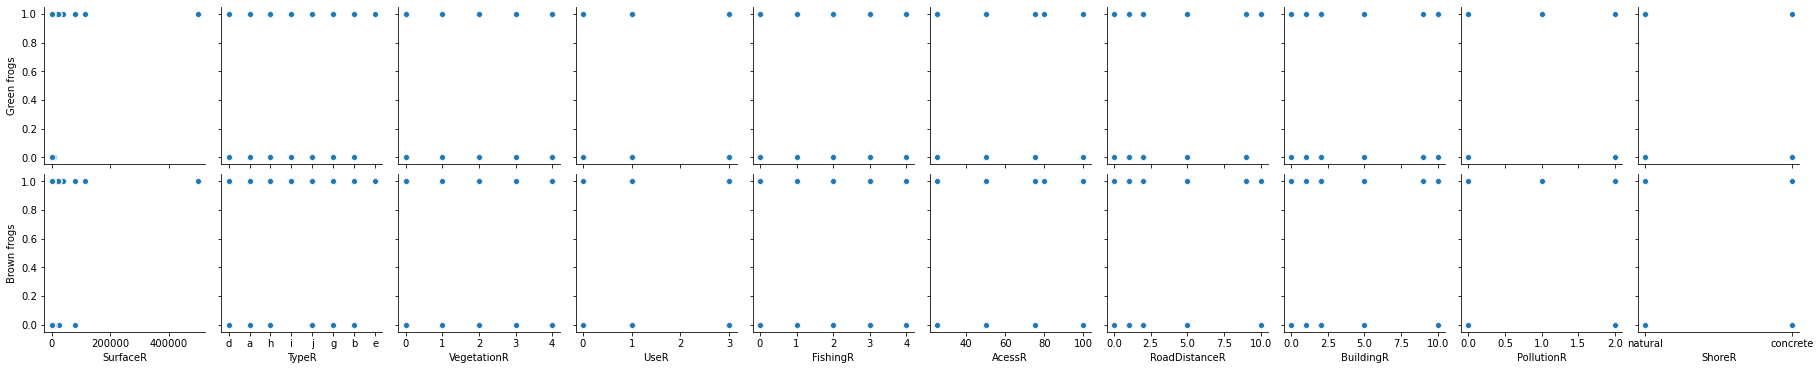

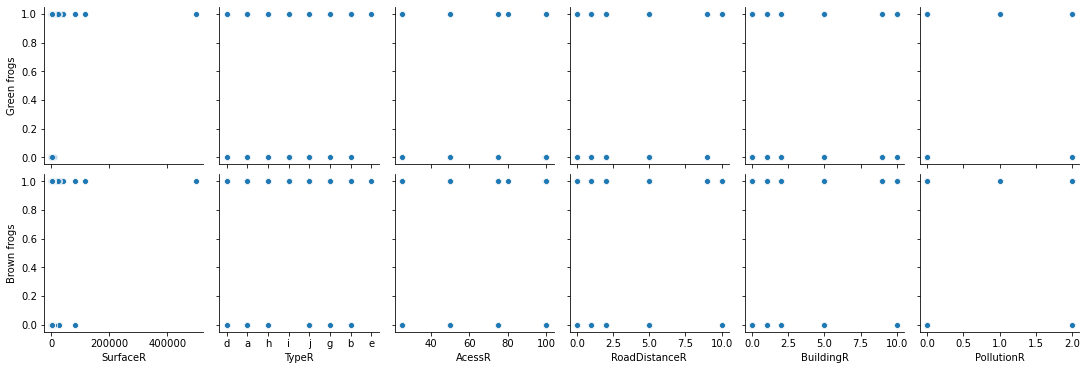

In [72]:
# Your code
# finished
from sklearn.linear_model import LogisticRegression
import seaborn as sns
import matplotlib.pyplot as plt
import pandas as pd

df = pd.read_csv('sampled_data_for_Regression.csv')

sns.pairplot(df, x_vars=["SurfaceR","TypeR","VegetationR","UseR","FishingR","AcessR","RoadDistanceR","BuildingR","PollutionR","ShoreR"],
             y_vars=["Green frogs","Brown frogs"])
plt.show()

#abandon some really bad ones and see closer, Need data points to be different between 0 and 1 !!!

sns.pairplot(df, x_vars=["SurfaceR","TypeR","AcessR","RoadDistanceR","BuildingR","PollutionR"],
             y_vars=["Green frogs","Brown frogs"])
plt.show()

#choose relatively better ones.
#For "Green frogs": "SurfaceR","PollutionR","AcessR","RoadDistanceR"
#For "Brown frogs": "SurfaceR","PollutionR","AcessR","TypeR"

Explanation: At first, I choose pairplot to see how each of the potential descriptive features interacts with "Green frogs" and "Brown frogs". My goal is to find good descriptive features that can find out whether there are frogs or not (the result is either 0 or 1). To be more specific, I need the data points to be different when result = 1 or 0. For example, "VegetationR" when result = 1 is the same when result = 0, so I abandoned "VegetationR". However, I think all of the potential descriptive features are not good enough. In the end, I choose relatively better ones.
For "Green frogs": "SurfaceR","PollutionR","AcessR","RoadDistanceR"
For "Brown frogs": "SurfaceR","PollutionR","AcessR","TypeR"

   (d) For both frog types, train a logistic regression classifier to predict the presence of that frog type in the habitat. Use the descriptive features as chosen in Q3c. Apply the modification from Q3b if needed.

In [73]:
# Your code
# finished
df = pd.read_csv('sampled_data_for_Regression_modified.csv')
descriptiveFeatures_frog_green = df[["SurfaceR","PollutionR","AcessR","RoadDistanceR"]]
targetFeature_frog_green = df['Green frogs']
descriptiveFeatures_frog_brown = df[["SurfaceR","PollutionR","AcessR","TypeR"]]
targetFeature_frog_brown = df['Brown frogs']

from sklearn.linear_model import LogisticRegression
classifier1 = LogisticRegression(solver = 'liblinear', multi_class = 'ovr')
classifier1.fit(descriptiveFeatures_frog_green, targetFeature_frog_green)
targetFeature1 = classifier1.predict(descriptiveFeatures_frog_green)
print('Coefficients Green: \n', classifier1.coef_)
print('Intercept Green: \n', classifier1.intercept_)
print('Target Feature Green: \n',targetFeature1)

classifier2 = LogisticRegression(solver = 'liblinear', multi_class = 'ovr')
classifier2.fit(descriptiveFeatures_frog_brown, targetFeature_frog_brown)
targetFeature2 = classifier2.predict(descriptiveFeatures_frog_brown)
print('Coefficients Brown: \n', classifier2.coef_)
print('Intercept Brown: \n', classifier2.intercept_)
print('Target Feature Brown: \n',targetFeature2)

Coefficients Green: 
 [[ 0.00022898  0.00032731 -0.00188663  0.00420318]]
Intercept Green: 
 [5.79217305e-06]
Target Feature Green: 
 [1 0 1 0 0 1 0 1 0 0 0 1 1 1 1 0 0 1 1 1 1 1 1 0 1 1 1 1 1 1 0 0 1 1 0 0 0
 1 0 1 1 0 1 1 1 0 1 1 0 0 1 1 0 1 1 0 1 0 1 0 0 0 0 0 0 1 0 0 1 0 0 1 0 1
 1 0 0 1 0 1 1 0 1 1 1 1 0 1 0 1 1 0 0 0 1 1 0 0 1 0 0 0 1 0 0 0 0 0 0 0 0
 0 0 0 1 0 0 1 1 1 1 1 0 1 1 1 1 1 0 1 1 1 1 0 1 1 1 1 0 0 1 0 0 0 1 1 0 1
 1 0 1 1 0 0 1 0 0 1 1 0 1 1 1 1 0 0 1 0 0 0]
Coefficients Brown: 
 [[3.92162066e-06 2.00062832e-08 1.54679815e-02 2.75655872e-04]]
Intercept Brown: 
 [0.00015423]
Target Feature Brown: 
 [1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1
 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1
 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1
 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1
 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1]


   (e) For each of the two trained classifiers compute and print the confusion matrix.

In [78]:
# Your code
# finished
import pandas as pd
from sklearn.metrics import confusion_matrix
print('Green: \n', confusion_matrix(targetFeature_frog_green, targetFeature1))
print('Brown: \n', confusion_matrix(targetFeature_frog_brown, targetFeature2))

Green: 
 [[44 26]
 [37 63]]
Brown: 
 [[  0  35]
 [  0 135]]


(f) Based on the information computed in Q3 so far, interpret and evaluate the two models and compare them. Why are they similar/different? Would you recommend the models and why (not)? How do you think the applied methods could be improved to get better results?

Explanation: For both frog types, the models are trained by a logistic regression classifier. The descriptive features chosen for these two frog types are just slightly different because of what is shown in Q3 (c). But "Brown frogs" is not as easy to be decided as "Green frogs", because it doesn't seem to rely on these descriptive features much. I would recommend the model for "Green frogs" because the confusion matrix looks fine, but not the model for "Brown frogs", I think we need other better descriptive features or data outside of the given dataset for "Brown frogs".

## Question 4 - Support Vector Machines (8 points):

For this question (Q4), restrict your data set to the same features as in Q3. Similar to Q3, we want to train two distinct classifiers predicting the presence of green frogs and brown frogs in the habitat. 

In this question, we will use SVMs instead of logistic regression. In the following, consider *Green frogs* and *Brown frogs* to be potential target features, while all other features are potential descriptive features.

In [2]:
# Your code
# finished
import pandas as pd
from sklearn.svm import SVC
df = pd.read_csv('sampled_data_for_Regression_modified.csv')

   (a) Which of the potential descriptive features are suitable as an input for SVMs and which need to be modified first? Modify the data as needed and provide a brief explanation. Print the first two data rows of the modified data set.

In [3]:
# Your code
# finished
# same as regression
# encode labels with value between 0 and n_classes-1

#"TypeR" and "ShoreR" need to be modified first because they are categorical attributes expressed in letters, 
#"SurfaceR","VegetationR","UseR","FishingR","AcessR","RoadDistanceR","BuildingR","PollutionR" are suitable as input because they are numerical.

from sklearn.preprocessing import LabelEncoder, OneHotEncoder
df = pd.read_csv('sampled_data_for_Regression.csv')
print("Before:")
print(df[["TypeR","ShoreR"]][:2]) #limited to the first two data rows

encoder = LabelEncoder()
df4 = pd.DataFrame(df["TypeR"])
df_LE = df4.apply(encoder.fit_transform)
df["TypeR"] = df_LE
#print(df_LE[:2]) #limited to the first two data rows

df4 = pd.DataFrame(df["ShoreR"])
df_LE = df4.apply(encoder.fit_transform)
df["ShoreR"] = df_LE

df.to_csv('sampled_data_for_Regression_modified.csv', index=False)
df = pd.read_csv('sampled_data_for_Regression_modified.csv')
print("After:")
print(df[["TypeR","ShoreR"]][:2]) #limited to the first two data rows

Before:
  TypeR   ShoreR
0     d  natural
1     d  natural
After:
   TypeR  ShoreR
0      2       1
1      2       1


Explanation: "TypeR" and "ShoreR" need to be modified first because they are categorical attributes expressed in letters, 
#"SurfaceR","VegetationR","UseR","FishingR","AcessR","RoadDistanceR","BuildingR","PollutionR" are suitable as input because they are numerical.

   (b) For each frog type, consider the same set of 4 descriptive features as chosen in Q3 c). Generate for both target features a training and test set based on all data rows (for example, consider the sampling strategies as explained in the lecture) of the restricted data set. Briefly explain and motivate the choice of the sampling strategy as well as the size of the training and test set.

In [5]:
# Your code
# finished
# define descriptive and target features as before
import pandas as pd
import statistics
from sklearn.svm import SVC
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import cross_val_predict
from sklearn.metrics import classification_report

df = pd.read_csv('sampled_data_for_Regression_modified.csv')
descriptiveFeatures_frog_green = df[["SurfaceR","PollutionR","AcessR","RoadDistanceR"]]
targetFeature_frog_green = df['Green frogs']
descriptiveFeatures_frog_brown = df[["SurfaceR","PollutionR","AcessR","TypeR"]]
targetFeature_frog_brown = df['Brown frogs']

#train an SVM classifier
classifier_green = SVC(C=1, kernel='rbf', gamma = 'auto')
score_green = cross_val_score(classifier_green, descriptiveFeatures_frog_green, targetFeature_frog_green, scoring='accuracy', cv=10)
targetFeature_green_predict = cross_val_predict(classifier_green, descriptiveFeatures_frog_green, targetFeature_frog_green, cv=10)

classifier_brown = SVC(C=1, kernel='rbf', gamma = 'auto')
score_brown = cross_val_score(classifier_brown, descriptiveFeatures_frog_brown, targetFeature_frog_brown, scoring='accuracy', cv=10)
targetFeature_brown_predict = cross_val_predict(classifier_brown, descriptiveFeatures_frog_brown, targetFeature_frog_brown, cv=10)

print("========== C=1, kernel='rbf' ==========\n")

print("Green Accuracy:", score_green)
print("Green Accuracy Mean:", statistics.mean(score_green))
print('Green classification report: \n')
print(classification_report(targetFeature_frog_green, targetFeature_green_predict)) 

print("Brown Accuracy:", score_brown)
print("Brown Accuracy Mean:", statistics.mean(score_brown))
print('Brown classification report: \n')
print(classification_report(targetFeature_frog_brown, targetFeature_brown_predict)) 

========== C=1, kernel='rbf' ==========

Green Accuracy: [0.64705882 0.70588235 0.58823529 0.35294118 0.70588235 0.76470588
 0.88235294 0.58823529 0.76470588 0.52941176]
Green Accuracy Mean: 0.6529411764705882
Green classification report: 

              precision    recall  f1-score   support

           0       0.63      0.39      0.48        70
           1       0.66      0.84      0.74       100

    accuracy                           0.65       170
   macro avg       0.64      0.61      0.61       170
weighted avg       0.65      0.65      0.63       170

Brown Accuracy: [0.82352941 0.82352941 0.82352941 0.82352941 0.82352941 0.82352941
 0.76470588 0.76470588 0.70588235 0.70588235]
Brown Accuracy Mean: 0.788235294117647
Brown classification report: 

              precision    recall  f1-score   support

           0       0.44      0.11      0.18        35
           1       0.81      0.96      0.88       135

    accuracy                           0.79       170
   macro avg   

Explanation: For the SVM classifier I used radial basis function kernel and typical C, because the result is 0 or 1. I used 10-fold cross validation to generate training and test set, it is good because 10 is a typical value, it can yield test error rate estimates that suffer neither from excessively high bias nor from very high variance. My test set is one-tenth of the entire data set.

   (c) Use the training set to train 4 different SVMs (2 per frog type) with different parameter combinations. Use at least two distinct values for the parameters *kernel* and *C*.

*Hint: depending on the size of the training data and chosen parameters, training the SVMs may take some time.*

In [9]:
# Your code
# finished
classifier1_green = SVC(C=0.01, kernel='rbf', gamma = 'auto')
score_green1 = cross_val_score(classifier1_green, descriptiveFeatures_frog_green, targetFeature_frog_green, scoring='accuracy', cv=10)
targetFeature_green_predict1 = cross_val_predict(classifier1_green, descriptiveFeatures_frog_green, targetFeature_frog_green, cv=10)

classifier1_brown = SVC(C=0.01, kernel='rbf', gamma = 'auto')
score_brown1 = cross_val_score(classifier1_brown, descriptiveFeatures_frog_brown, targetFeature_frog_brown, scoring='accuracy', cv=10)
targetFeature_brown_predict1 = cross_val_predict(classifier1_brown, descriptiveFeatures_frog_brown, targetFeature_frog_brown, cv=10)

print("========== C=0.01, kernel='rbf' ==========\n")

print("Green Accuracy:", score_green1)
print("Green Accuracy Mean:", statistics.mean(score_green1))
print('Green classification report: \n')
print(classification_report(targetFeature_frog_green, targetFeature_green_predict1, zero_division=0)) 

print("Brown Accuracy:", score_brown1)
print("Brown Accuracy Mean:", statistics.mean(score_brown1))
print('Brown classification report: \n')
print(classification_report(targetFeature_frog_brown, targetFeature_brown_predict1, zero_division=0)) 

========== C=0.01, kernel='rbf' ==========

Green Accuracy: [0.58823529 0.58823529 0.58823529 0.58823529 0.58823529 0.58823529
 0.58823529 0.58823529 0.58823529 0.58823529]
Green Accuracy Mean: 0.5882352941176471
Green classification report: 

              precision    recall  f1-score   support

           0       0.00      0.00      0.00        70
           1       0.59      1.00      0.74       100

    accuracy                           0.59       170
   macro avg       0.29      0.50      0.37       170
weighted avg       0.35      0.59      0.44       170

Brown Accuracy: [0.82352941 0.82352941 0.82352941 0.82352941 0.82352941 0.76470588
 0.76470588 0.76470588 0.76470588 0.76470588]
Brown Accuracy Mean: 0.7941176470588235
Brown classification report: 

              precision    recall  f1-score   support

           0       0.00      0.00      0.00        35
           1       0.79      1.00      0.89       135

    accuracy                           0.79       170
   macro av

In [7]:
classifier2_green = SVC(C=1, kernel='linear', gamma = 'auto')
score_green2 = cross_val_score(classifier2_green, descriptiveFeatures_frog_green, targetFeature_frog_green, scoring='accuracy', cv=10)
targetFeature_green_predict2 = cross_val_predict(classifier2_green, descriptiveFeatures_frog_green, targetFeature_frog_green, cv=10)

classifier2_brown = SVC(C=1, kernel='linear', gamma = 'auto')
score_brown2 = cross_val_score(classifier2_brown, descriptiveFeatures_frog_brown, targetFeature_frog_brown, scoring='accuracy', cv=10)
targetFeature_brown_predict2 = cross_val_predict(classifier2_brown, descriptiveFeatures_frog_brown, targetFeature_frog_brown, cv=10)

print("========== C=1, kernel='linear' ==========\n")

print("Green Accuracy:", score_green2)
print("Green Accuracy Mean:", statistics.mean(score_green2))
print('Green classification report: \n')
print(classification_report(targetFeature_frog_green, targetFeature_green_predict2, zero_division=0)) 

print("Brown Accuracy:", score_brown2)
print("Brown Accuracy Mean:", statistics.mean(score_brown2))
print('Brown classification report: \n')
print(classification_report(targetFeature_frog_brown, targetFeature_brown_predict2, zero_division=0)) 

========== C=1, kernel='linear' ==========

Green Accuracy: [0.76470588 0.76470588 0.47058824 0.47058824 0.58823529 0.52941176
 0.76470588 0.70588235 0.64705882 0.58823529]
Green Accuracy Mean: 0.6294117647058823
Green classification report: 

              precision    recall  f1-score   support

           0       0.54      0.66      0.59        70
           1       0.72      0.61      0.66       100

    accuracy                           0.63       170
   macro avg       0.63      0.63      0.63       170
weighted avg       0.64      0.63      0.63       170

Brown Accuracy: [0.82352941 0.82352941 0.82352941 0.82352941 0.82352941 0.82352941
 0.76470588 0.64705882 0.70588235 0.76470588]
Brown Accuracy Mean: 0.7823529411764706
Brown classification report: 

              precision    recall  f1-score   support

           0       0.25      0.03      0.05        35
           1       0.80      0.98      0.88       135

    accuracy                           0.78       170
   macro av

In [10]:
classifier3_green = SVC(C=100, kernel='rbf', gamma = 'auto')
score_green3 = cross_val_score(classifier3_green, descriptiveFeatures_frog_green, targetFeature_frog_green, scoring='accuracy', cv=10)
targetFeature_green_predict3 = cross_val_predict(classifier3_green, descriptiveFeatures_frog_green, targetFeature_frog_green, cv=10)

classifier3_brown = SVC(C=100, kernel='rbf', gamma = 'auto')
score_brown3 = cross_val_score(classifier3_brown, descriptiveFeatures_frog_brown, targetFeature_frog_brown, scoring='accuracy', cv=10)
targetFeature_brown_predict3 = cross_val_predict(classifier3_brown, descriptiveFeatures_frog_brown, targetFeature_frog_brown, cv=10)

print("========== C=100, kernel='rbf' ==========\n")

print("Green Accuracy:", score_green3)
print("Green Accuracy Mean:", statistics.mean(score_green3))
print('Green classification report: \n')
print(classification_report(targetFeature_frog_green, targetFeature_green_predict3, zero_division=0)) 

print("Brown Accuracy:", score_brown3)
print("Brown Accuracy Mean:", statistics.mean(score_brown3))
print('Brown classification report: \n')
print(classification_report(targetFeature_frog_brown, targetFeature_brown_predict3, zero_division=0)) 

========== C=100, kernel='rbf' ==========

Green Accuracy: [0.64705882 0.70588235 0.58823529 0.35294118 0.70588235 0.76470588
 0.82352941 0.58823529 0.82352941 0.58823529]
Green Accuracy Mean: 0.6588235294117647
Green classification report: 

              precision    recall  f1-score   support

           0       0.62      0.46      0.52        70
           1       0.68      0.80      0.73       100

    accuracy                           0.66       170
   macro avg       0.65      0.63      0.63       170
weighted avg       0.65      0.66      0.65       170

Brown Accuracy: [0.82352941 0.82352941 0.82352941 0.70588235 0.82352941 0.82352941
 0.76470588 0.76470588 0.70588235 0.70588235]
Brown Accuracy Mean: 0.7764705882352941
Brown classification report: 

              precision    recall  f1-score   support

           0       0.36      0.11      0.17        35
           1       0.81      0.95      0.87       135

    accuracy                           0.78       170
   macro avg

   (d) Compute and print the mean accuracy and the classification report of the trained SVMs with respect to the test set (see instruction for examples).

   (e) Based on the information computed in Q4 so far, interpret and evaluate the 4 SVMs and compare them. Why are they similar/different? Would you recommend using these SVMs and why (not)?

Explanation: I trained several SVMs to see how they behave when changing kernel and Regularization parameter C individually. For both frog types, there are models: 
(1) C=1, kernel='rbf'(radial basis function). 
(2) C=0.01, kernel='rbf'. 
(3) C=1, kernel='linear'. 
(4) C=100, kernel='rbf'. 
For Green Frogs, the models with C=1 or 100 all work well, so radial basis function kernel and linear kernel are both suitable for the dataset. But linear kernel takes more time so I won't recommend it. And the linear kernel will work fine if the dataset is linearly separable, in this case, although it seems to be linearly separable, but since the result of frogs is either 0 or 1, radial basis function might be better. When I change C to 0.01, the performance apparently goes worse. We can tell by checking the F1 score since it is a weighted harmonic mean of precision and recall which can compare classifier models in a better way. Since the C parameter decides how much to avoid misclassifying each training example, a small C like 0.01 will misclassify more data to get a larger-margin hyperplane (underfitting). Normally we only use small C when data is not separable. And a too high C might lead to overfitting. In conclusion, I recommend C=1, kernel='rbf' for Green Frogs.
For Brown Frogs, mostly the same. C=1, kernel='rbf' is the best among all the models. But the result 0 seems to be bad in all models, compared with Green Frogs. Maybe we need more data or better features outside of the given dataset for Brown Frogs. And I think SVM is doing a better job than regression.

## Question 5 - Neural Networks (15 points)
In this question consider the sampled_data, which is the dataset that you have created in the *Preprocessing of Dataset* section. The target features are the *different frogs*.

   (a) What are the possible inputs of your network?
   
     - Give the number of possible values of the different categorical inputs.
     - Give the number of possible input patterns for the categorical data.

In [12]:
# Your code
# finished
import pandas as pd
import numpy as np

sampled_data = pd.read_csv('sampled_data.csv')

# As ID does not play a role in prediction so I will drop it now
sampled_data = sampled_data.drop(['ID'], axis = 1)

# Printing the information about the data
print("========= The information about the data =========\n")
sampled_data.info()
sampled_data.head()
print("\n")

#As given in the question, all frog types are target features, all the remaining columns are the descriptive features

descriptive_features = ['SurfaceR', 'NumberR', 'TypeR', 'VegetationR', 'Surroundings1', 'Surroundings2', 'Surroundings3',
                        'UseR', 'FishingR', 'AcessR', 'RoadDistanceR', 'BuildingR', 'PollutionR', 'ShoreR']
target_features = ['Green frogs', 'Brown frogs', 'Common toad', 'Fire-bellied toad', 'Tree frog', 'Common newt',
                   'Great crested newt']

descriptive_features_data = sampled_data.drop(target_features, axis = 1)
target_features_data = sampled_data.drop(descriptive_features, axis = 1)

print("========= Descriptive_features =========\n")
descriptive_features_data.info()
print("\n")
print("========= Target_features =========\n")
target_features_data.info()
print("\n")

# Possible categorical inputs
categorical_inputs = ['TypeR', 'VegetationR', 'Surroundings1', 'Surroundings2', 'Surroundings3', 'UseR', 'FishingR',
                      'PollutionR', 'ShoreR', 'AcessR']

# Number of possible values of the different categorical inputs
print("========= possible inputs =========\n")
possible_values_vector = [len(descriptive_features_data[input].unique()) for input in categorical_inputs]

print("Categorical inputs {} Number of possible values: {}".format(categorical_inputs, possible_values_vector))

#Give the number of possible input patterns for the categorical data
print("Number of possible input patterns for the categorical data: {}".format(np.product(possible_values_vector, axis=0)))

========= The information about the data =========

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 170 entries, 0 to 169
Data columns (total 21 columns):
SurfaceR              170 non-null int64
NumberR               170 non-null int64
TypeR                 170 non-null object
VegetationR           170 non-null int64
Surroundings1         170 non-null object
Surroundings2         170 non-null object
Surroundings3         170 non-null object
UseR                  170 non-null int64
FishingR              170 non-null int64
AcessR                170 non-null int64
RoadDistanceR         170 non-null int64
BuildingR             170 non-null int64
PollutionR            170 non-null int64
ShoreR                170 non-null object
Green frogs           170 non-null int64
Brown frogs           170 non-null int64
Common toad           170 non-null int64
Fire-bellied toad     170 non-null int64
Tree frog             170 non-null int64
Common newt           170 non-null int64
Great crested newt

Explanation:

There are 7 different frogs that will be output and 14 descriptive features which are all possible inputs. 
possible_input_example=[700,1,4,1,6,5,6,3,1,75,1,1,0,0] # a 14 dimensional vector.
possible_output_example=[0,1,1,0,0,1,0] # a 7 dimensional vector.

For categoricals inputs:
1) Categorical inputs are ['TypeR', 'VegetationR', 'Surroundings1', 'Surroundings2', 'Surroundings3', 'UseR', 'FishingR', 'PollutionR', 'ShoreR', 'AcessR'] , their numbers of possible values are [8, 5, 7, 7, 7, 3, 5, 3, 2, 6].

2) Number of possible input patterns for the categorical data: 7408800

   (b) Choose one categorical feature and two non-categorical features as input features. Create a data set with those features and the target columns (different frogs). Name this data set *NN_data*.

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 170 entries, 0 to 169
Data columns (total 10 columns):
RoadDistanceR         170 non-null int64
SurfaceR              170 non-null int64
UseR                  170 non-null int64
Green frogs           170 non-null int64
Brown frogs           170 non-null int64
Common toad           170 non-null int64
Fire-bellied toad     170 non-null int64
Tree frog             170 non-null int64
Common newt           170 non-null int64
Great crested newt    170 non-null int64
dtypes: int64(10)
memory usage: 13.4 KB


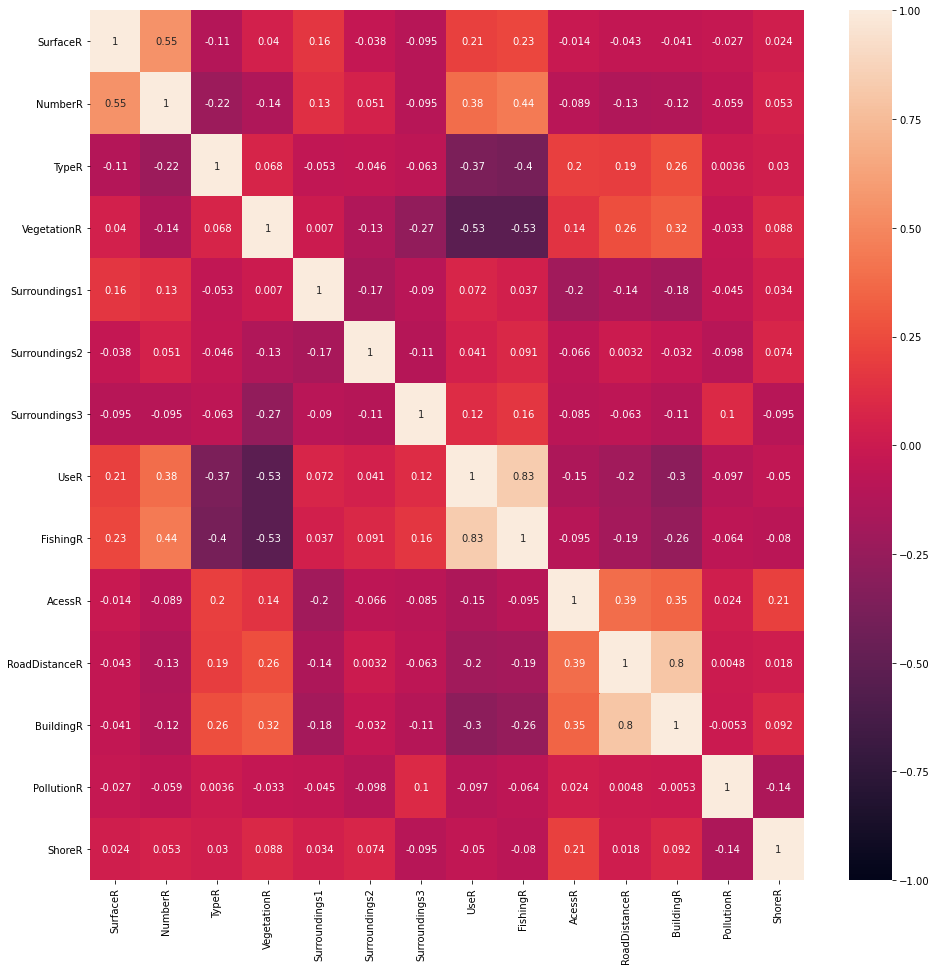

In [13]:
# the student should choose -> results differ
import seaborn as sns
import matplotlib.pyplot as plt
# finished

# To select 2 non-categorical and one categorical variable 
# we can plot the co-relation graph between features to avoid choosing redundant features
# using descriptive features data from sampled_data
# descriptive_features_data.info()

# Convert non numeric categorical variables into numeric values using label encoding
categorical_variables_converted = ['TypeR', 'Surroundings1', 'Surroundings2', 'Surroundings3', 'ShoreR']
for feature in categorical_variables_converted:
    descriptive_features_data[feature] = descriptive_features_data[feature].astype('category').cat.codes
    
# Calculate corelation matrix
corelation_matrix = descriptive_features_data.corr()
plt.figure(figsize=(16, 16))
heatmap = sns.heatmap(corelation_matrix, vmin=-1, vmax=1, annot=True)

# we are choosing 'RoadDistanceR', 'SurfaceR', 'UseR'
NN_descriptive_features = ['RoadDistanceR', 'SurfaceR', 'UseR']
NN_data = sampled_data[NN_descriptive_features + target_features]
NN_data.to_csv('NN_data.csv', index=False)

NN_data.info()

Explanation:

We wanted to find the co-relation between descriptive features so that we can avoid choosing redundant features, for that purpose we converted the categorical variables that were not numeric into numerics using label encoding and then printed the heatmap.

The categorical variables are:
['TypeR', 'VegetationR', 'Surroundings1', 'Surroundings2', 'Surroundings3', 'UseR', 'FishingR','PollutionR', 'ShoreR', 'AcessR']

The numeric variables are:['SurfaceR', 'NumberR', 'RoadDistanceR', 'BuildingR']

For non categorical features, as we can see from the map, there is a high corelation between "RoadDistanceR" and "BuildingR" which is .8 and between SurfaceR and NumberR which is .55. So we should not choose them both. We can use only one from those. Here we are choosing "RoadDistanceR" and "SurfaceR".

For categorical features, "UseR" and "FishingR" have the highest corelation. We should not choose them both. Let's choose "UseR".

   (c) Convert the features that need to be converted using One-Hot-Encoding. Explain why you need (not) to convert these features. Name the data set *NN_data_encoded*.

In [14]:
# Your code
# finished
# From 3 descriptive features 2 of the freatures are already in numeric form 
# and the categorial variable "UseR" is in ordinal form already 
# so we dont need to convert any feature using theOnehot encoding.
NN_data_encoded = NN_data
NN_data_encoded.to_csv('NN_data_encoded.csv', index=False)
NN_data_encoded.head()

,RoadDistanceR,SurfaceR,UseR,Green frogs,Brown frogs,Common toad,Fire-bellied toad,Tree frog,Common newt,Great crested newt
0,1,700,3,0,1,1,0,0,1,0
1,1,200,3,0,1,1,0,0,1,0
2,0,300,3,0,0,1,0,0,0,0
3,0,600,0,0,1,1,1,0,1,1
4,0,200,1,0,0,0,0,0,0,0


Explanation:

From 3 descriptive features 2 of the freatures are already in numeric form and the categorial variable "UseR" is in ordinal form already so we dont need to convert any feature using theOnehot encoding.

   (d) Create a training and test set with 90% of the rows of your *NN_data_encoded* data set for training and 10% as test data set. Name them *train_NN* and *test_NN*

In [15]:
# Your code
# finished
from sklearn.model_selection import train_test_split
# Slpitting the dataset into
train_NN, test_NN = train_test_split(NN_data_encoded, test_size=0.1)

# Splitting the test and train datasets in to X and Y.
train_NN_X = train_NN[NN_descriptive_features]
train_NN_Y = train_NN[target_features]

test_NN_X = test_NN[NN_descriptive_features]
test_NN_Y = test_NN[target_features]

print('train_NN size: ', len(train_NN_X))
print('test_NN size: ', len(test_NN_X))

train_NN size:  153
test_NN size:  17


Explanation:

Firstly we created a split of 90/10 percent for train and test data respectively. After that we further splitted each data into descriptive and target part.

   (e) Train two different Neural Networks, one with a linear activation function and one with a non-linear activation function. All other settings stay default. Give the accuracy of each Neural Network for the training and test set (*train_NN* and *test_NN*. Which activation function seems to be better?

In [61]:
# (linear activation function):
# finished
import warnings
warnings.filterwarnings("ignore")
from sklearn.neural_network import MLPClassifier
from sklearn.metrics import accuracy_score
from numpy import mean

linear_classifier = MLPClassifier(activation='identity')

print("Try 5 times:\n")

linear_classifier.fit(train_NN_X, train_NN_Y)
prediction = linear_classifier.predict(test_NN_X)
accuracy_scr = accuracy_score(test_NN_Y, prediction)
print("The Accuracy score for Linear Activation function : {}".format(accuracy_scr))

linear_classifier.fit(train_NN_X, train_NN_Y)
prediction = linear_classifier.predict(test_NN_X)
accuracy_scr = accuracy_score(test_NN_Y, prediction)
print("The Accuracy score for Linear Activation function : {}".format(accuracy_scr))

linear_classifier.fit(train_NN_X, train_NN_Y)
prediction = linear_classifier.predict(test_NN_X)
accuracy_scr = accuracy_score(test_NN_Y, prediction)
print("The Accuracy score for Linear Activation function : {}".format(accuracy_scr))

linear_classifier.fit(train_NN_X, train_NN_Y)
prediction = linear_classifier.predict(test_NN_X)
accuracy_scr = accuracy_score(test_NN_Y, prediction)
print("The Accuracy score for Linear Activation function : {}".format(accuracy_scr))

linear_classifier.fit(train_NN_X, train_NN_Y)
prediction = linear_classifier.predict(test_NN_X)
accuracy_scr = accuracy_score(test_NN_Y, prediction)
print("The Accuracy score for Linear Activation function : {}".format(accuracy_scr))

print("\nTry each frog type:\n")

linear_classifier1 = MLPClassifier(activation='identity')

linear_classifier1.fit(train_NN_X, train_NN[target_features[0]])
linear_classifier1.predict(test_NN_X)
accuracy0 = linear_classifier1.score(test_NN_X, test_NN[target_features[0]])
print("Accuracy of green frogs: ", accuracy0)

linear_classifier1.fit(train_NN_X, train_NN[target_features[1]])
linear_classifier1.predict(test_NN_X)
accuracy1 = linear_classifier1.score(test_NN_X, test_NN[target_features[1]])
print("Accuracy of brown frogs: ", accuracy1)

linear_classifier1.fit(train_NN_X, train_NN[target_features[2]])
linear_classifier1.predict(test_NN_X)
accuracy2 = linear_classifier1.score(test_NN_X, test_NN[target_features[2]])
print("Accuracy of common toad: ", accuracy2)

linear_classifier1.fit(train_NN_X, train_NN[target_features[3]])
linear_classifier1.predict(test_NN_X)
accuracy3 = linear_classifier1.score(test_NN_X, test_NN[target_features[3]])
print("Accuracy of fire-bellied toad: ", accuracy3)

linear_classifier1.fit(train_NN_X, train_NN[target_features[4]])
linear_classifier1.predict(test_NN_X)
accuracy4 = linear_classifier1.score(test_NN_X, test_NN[target_features[4]])
print("Accuracy of tree frog: ", accuracy4)

linear_classifier1.fit(train_NN_X, train_NN[target_features[5]])
linear_classifier1.predict(test_NN_X)
accuracy5 = linear_classifier1.score(test_NN_X, test_NN[target_features[5]])
print("Accuracy of common newt: ", accuracy5)

linear_classifier1.fit(train_NN_X, train_NN[target_features[6]])
linear_classifier1.predict(test_NN_X)
accuracy6 = linear_classifier1.score(test_NN_X, test_NN[target_features[6]])
print("Accuracy of great crested newt: ", accuracy6)

print("Average Accuracy: ", mean([accuracy1,accuracy2,accuracy3,accuracy4,accuracy5,accuracy6,accuracy0]))

Try 5 times:

The Accuracy score for Linear Activation function : 0.0
The Accuracy score for Linear Activation function : 0.0
The Accuracy score for Linear Activation function : 0.0
The Accuracy score for Linear Activation function : 0.0
The Accuracy score for Linear Activation function : 0.058823529411764705

Try each frog type:

Accuracy of green frogs:  0.5882352941176471
Accuracy of brown frogs:  0.8823529411764706
Accuracy of common toad:  0.8235294117647058
Accuracy of fire-bellied toad:  0.8235294117647058
Accuracy of tree frog:  0.4117647058823529
Accuracy of common newt:  0.29411764705882354
Accuracy of great crested newt:  0.11764705882352941
Average Accuracy:  0.5630252100840336


In [62]:
# (non-linear activation function):
# finished
import warnings
warnings.filterwarnings("ignore")
from sklearn.neural_network import MLPClassifier

# Multi-layer Perceptron
# Class MLPClassifier implements a multi-layer perceptron (MLP) algorithm that trains using Backpropagation.
non_linear_classifier = MLPClassifier(activation="logistic") # the logistic sigmoid function, returns f(x) = 1 / (1 + exp(-x)).

print("Try 5 times:\n")

non_linear_classifier.fit(train_NN_X, train_NN_Y)
prediction = non_linear_classifier.predict(test_NN_X)
accuracy_scr = accuracy_score(test_NN_Y, prediction)
print("The Accuracy score for Non Linear Activation function :{}".format(accuracy_scr))

non_linear_classifier.fit(train_NN_X, train_NN_Y)
prediction = non_linear_classifier.predict(test_NN_X)
accuracy_scr = accuracy_score(test_NN_Y, prediction)
print("The Accuracy score for Non Linear Activation function :{}".format(accuracy_scr))

non_linear_classifier.fit(train_NN_X, train_NN_Y)
prediction = non_linear_classifier.predict(test_NN_X)
accuracy_scr = accuracy_score(test_NN_Y, prediction)
print("The Accuracy score for Non Linear Activation function :{}".format(accuracy_scr))

non_linear_classifier.fit(train_NN_X, train_NN_Y)
prediction = non_linear_classifier.predict(test_NN_X)
accuracy_scr = accuracy_score(test_NN_Y, prediction)
print("The Accuracy score for Non Linear Activation function :{}".format(accuracy_scr))

non_linear_classifier.fit(train_NN_X, train_NN_Y)
prediction = non_linear_classifier.predict(test_NN_X)
accuracy_scr = accuracy_score(test_NN_Y, prediction)
print("The Accuracy score for Non Linear Activation function :{}".format(accuracy_scr))

print("\nTry each frog type:\n")

non_linear_classifier1 = MLPClassifier(activation="logistic")

non_linear_classifier1.fit(train_NN_X, train_NN[target_features[0]])
non_linear_classifier1.predict(test_NN_X)
accuracy0 = non_linear_classifier1.score(test_NN_X, test_NN[target_features[0]])
print("Accuracy of green frogs: ", accuracy0)

non_linear_classifier1.fit(train_NN_X, train_NN[target_features[1]])
non_linear_classifier1.predict(test_NN_X)
accuracy1 = non_linear_classifier1.score(test_NN_X, test_NN[target_features[1]])
print("Accuracy of brown frogs: ", accuracy1)

non_linear_classifier1.fit(train_NN_X, train_NN[target_features[2]])
non_linear_classifier1.predict(test_NN_X)
accuracy2 = non_linear_classifier1.score(test_NN_X, test_NN[target_features[2]])
print("Accuracy of common toad: ", accuracy2)

non_linear_classifier1.fit(train_NN_X, train_NN[target_features[3]])
non_linear_classifier1.predict(test_NN_X)
accuracy3 = non_linear_classifier1.score(test_NN_X, test_NN[target_features[3]])
print("Accuracy of fire-bellied toad: ", accuracy3)

non_linear_classifier1.fit(train_NN_X, train_NN[target_features[4]])
non_linear_classifier1.predict(test_NN_X)
accuracy4 = non_linear_classifier1.score(test_NN_X, test_NN[target_features[4]])
print("Accuracy of tree frog: ", accuracy4)

non_linear_classifier1.fit(train_NN_X, train_NN[target_features[5]])
non_linear_classifier1.predict(test_NN_X)
accuracy5 = non_linear_classifier1.score(test_NN_X, test_NN[target_features[5]])
print("Accuracy of common newt: ", accuracy5)

non_linear_classifier1.fit(train_NN_X, train_NN[target_features[6]])
non_linear_classifier1.predict(test_NN_X)
accuracy6 = non_linear_classifier1.score(test_NN_X, test_NN[target_features[6]])
print("Accuracy of great crested newt: ", accuracy6)

print("Average Accuracy: ", mean([accuracy1,accuracy2,accuracy3,accuracy4,accuracy5,accuracy6,accuracy0]))

Try 5 times:

The Accuracy score for Non Linear Activation function :0.058823529411764705
The Accuracy score for Non Linear Activation function :0.11764705882352941
The Accuracy score for Non Linear Activation function :0.058823529411764705
The Accuracy score for Non Linear Activation function :0.058823529411764705
The Accuracy score for Non Linear Activation function :0.058823529411764705

Try each frog type:

Accuracy of green frogs:  0.47058823529411764
Accuracy of brown frogs:  0.8823529411764706
Accuracy of common toad:  0.8235294117647058
Accuracy of fire-bellied toad:  0.8235294117647058
Accuracy of tree frog:  0.5882352941176471
Accuracy of common newt:  0.7058823529411765
Accuracy of great crested newt:  0.8823529411764706
Average Accuracy:  0.7394957983193278


Explanation:
We used these two activation functions: 
(1)‘identity’, no-op activation, useful to implement linear bottleneck, returns f(x) = x. 
(2)‘logistic’, the logistic sigmoid function, returns f(x) = 1 / (1 + exp(-x)).
Based on the average accuracy, we can say the non-linear activation function (logistic sigmoid function) acts better than the linear activation function (identity).

   (f) Based on your result of (e) train 2 more Neural Networks with different settings (change at least 4 parameters (2 each)). Explain your parameters and the choice of the activation function. Evaluate the different Neural Networks with your test set by giving the accuracy. Try to increase the accuracy and analyse the factors that prohibit better accuracy.

In [77]:
# code for 2 more NN
# finished
import warnings
warnings.filterwarnings("ignore")
from sklearn.neural_network import MLPClassifier

# Multi-layer Perceptron
# Class MLPClassifier implements a multi-layer perceptron (MLP) algorithm that trains using Backpropagation.
# activation: the logistic sigmoid function, returns f(x) = 1 / (1 + exp(-x)).
# 'lbfgs' is an optimizer in the family of quasi-Newton methods
# the logistic sigmoid function, returns f(x) = 1 / (1 + exp(-x)).
model_1 = MLPClassifier(activation='logistic', hidden_layer_sizes=(150, 80), solver='lbfgs')  
model_1.fit(train_NN_X, train_NN_Y)
prediction_1 = model_1.predict(test_NN_X)
accuracy_scr_1 = accuracy_score(test_NN_Y, prediction_1)
print("The Accuracy score for Model 1 first time: {}".format(accuracy_scr_1))  
model_1.fit(train_NN_X, train_NN_Y)
prediction_1 = model_1.predict(test_NN_X)
accuracy_scr_1 = accuracy_score(test_NN_Y, prediction_1)
print("The Accuracy score for Model 1 second time: {}".format(accuracy_scr_1))

# hidden_layer_sizes represents the number of neurons in the hidden layers
model_2 = MLPClassifier(activation='logistic', hidden_layer_sizes=(200, 150, 100, 50), solver='sgd', learning_rate='adaptive', max_iter=500, tol=1e-5)  
model_2.fit(train_NN_X, train_NN_Y)
prediction_2 = model_2.predict(test_NN_X)
accuracy_scr_2 = accuracy_score(test_NN_Y, prediction_2)
print("The Accuracy score for Model 2 first time: {}".format(accuracy_scr_2)) 
model_2.fit(train_NN_X, train_NN_Y)
prediction_2 = model_2.predict(test_NN_X)
accuracy_scr_2 = accuracy_score(test_NN_Y, prediction_2)
print("The Accuracy score for Model 2 second time: {}".format(accuracy_scr_2))

print("\nTry tree frog as an example:\n")

model_3 = MLPClassifier(activation='logistic', hidden_layer_sizes=(150, 80), solver='lbfgs')
model_3.fit(train_NN_X, train_NN[target_features[4]])
prediction_3 = model_3.predict(test_NN_X)
accuracy_scr_3 = model_3.score(test_NN_X, test_NN[target_features[4]])
print("The Accuracy score for Model 1 :{}".format(accuracy_scr_3))

model_4 = MLPClassifier(activation='logistic', hidden_layer_sizes=(200, 150, 100, 50), solver='sgd', learning_rate='adaptive', max_iter=500, tol=1e-5) 
model_4.fit(train_NN_X, train_NN[target_features[4]])
prediction_4 = model_4.predict(test_NN_X)
accuracy_scr_4 = model_4.score(test_NN_X, test_NN[target_features[4]])
print("The Accuracy score for Model 2 :{}".format(accuracy_scr_4))

The Accuracy score for Model 1 first time: 0.058823529411764705
The Accuracy score for Model 1 second time: 0.058823529411764705
The Accuracy score for Model 2 first time: 0.11764705882352941
The Accuracy score for Model 2 second time: 0.11764705882352941

Try tree frog as an example:

The Accuracy score for Model 1 :0.5294117647058824
The Accuracy score for Model 2 :0.5882352941176471


Explanation:

Here we are keeping the better activation function which is logistic sigmoid function. 
Then we try to improve the result by first setting more neurons (for example in the first layer, from 100 neurons to 150 neurons), and setting solver to 'lbgs' and since the data set is not very big, we switch the solver for weight optimization from 'adam' to 'lbfgs', 'lbfgs' should converge faster and perform better. We got almost the same result.

Then for the second model, we first keep adding more neurons for different layers (more neurons/weights should be more accurate if it doesn't cause overfitting), and then we want to change the learning rate and maximum number of iterations so we change the solver for weight optimization to 'sgd'. We change the learning rate to adaptive so that it keeps the learning rate constant as long as training loss keeps decreasing, increased the maximum number of iterations, and decreased the tolerance for the optimization so the result might be more accurate. The accuracy gets slightly better in the end.

The result is acceptable as our dataset is very small we are trying to fit multiclassification problem with only 3 descriptive features so that's why the accuracy is low for our models. If we develop neural network for each type of frog, the result can be better.

## Question 6 - Evaluation (10 Points)

   (a) Consider two models of question 5 of your choice with the respective datasets (training and test data).

- Create training and test data for 3-fold cross validation.

In [78]:
# Your code
import pandas as pd
from sklearn.model_selection import KFold

# Your code
# finished

# Using the NN encoded dataset
NN_data = NN_data_encoded
print("Data head: \n", NN_data.head())
print("\n")

NN_data_X = NN_data[NN_descriptive_features]
NN_data_y = NN_data[target_features]

kf = KFold(n_splits=3)

X_train = []
y_train = []
X_test = []
y_test = []

# Splitting and Storing the 3 fold data set.
for train_index, test_index in kf.split(NN_data):
    print("TRAIN index:", train_index, "\nTEST index:", test_index) 
    X_train.append(NN_data_X[NN_data_X.index.isin(train_index)]), X_test.append(NN_data_X[NN_data_X.index.isin(test_index)])  
    y_train.append(NN_data_y[NN_data_y.index.isin(train_index)]), y_test.append(NN_data_y[NN_data_y.index.isin(test_index)]) 

print("\n====== Details about the sets: ======\n")
print("\nTake First Fold as an example:\n")
print("\nX_train:\n", X_train[0][:5])
print("\nY_train:\n", y_train[0][:5])
print("\nX_test:\n", X_test[0][:5])
print("\nY_test:\n", y_test[0][:5])

Data head: 
    RoadDistanceR  SurfaceR  UseR  Green frogs  Brown frogs  Common toad  \
0              1       700     3            0            1            1   
1              1       200     3            0            1            1   
2              0       300     3            0            0            1   
3              0       600     0            0            1            1   
4              0       200     1            0            0            0   

   Fire-bellied toad  Tree frog  Common newt  Great crested newt  
0                  0          0            1                   0  
1                  0          0            1                   0  
2                  0          0            0                   0  
3                  1          0            1                   1  
4                  0          0            0                   0  


TRAIN index: [ 57  58  59  60  61  62  63  64  65  66  67  68  69  70  71  72  73  74
  75  76  77  78  79  80  81  82  83  84  85  

In [79]:
import warnings
import numpy as np
from sklearn.metrics import multilabel_confusion_matrix, accuracy_score, precision_recall_fscore_support
warnings.filterwarnings("ignore")
# We are using 2 models from 5(e)

Lc_Model_NN = linear_classifier
Nlc_Model_NN = non_linear_classifier

#3 fold dataset
#X_train
#y_train
#X_test
#y_test

# Model 1 variables
Lc_Model_NN_con_matrix_train = []
Lc_Model_NN_con_matrix_test = []
Lc_Model_NN_acc_train = []
Lc_Model_NN_acc_test = []
Lc_Model_NN_perf_test = []
Cell_sum_train_1 =  np.zeros((7, 2, 2))
Cell_sum_test_1 = np.zeros((7, 2, 2))

# Model 2 variables
Nlc_Model_NN_con_matrix_train = []
Nlc_Model_NN_con_matrix_test = []
Nlc_Model_NN_acc_train = []
Nlc_Model_NN_acc_test = []
Nlc_Model_NN_perf_test = []
Cell_sum_train_2 =  np.zeros((7, 2, 2))
Cell_sum_test_2 = np.zeros((7, 2, 2))

# Training models
for index in range(len(X_train)):
    # Model 1 training, Calculating  confusion matrix, sum confusion matrix, accuracy
    train_prediction_1 = Lc_Model_NN.predict(X_train[index])
   
    Lc_Model_NN_con_matrix_train.append(multilabel_confusion_matrix(y_train[index], train_prediction_1))
    Cell_sum_train_1 = Cell_sum_train_1 + Lc_Model_NN_con_matrix_train[index]
    Lc_Model_NN_acc_train.append(accuracy_score(y_train[index], train_prediction_1))

    test_prediction_1 = Lc_Model_NN.predict(X_test[index])
    Lc_Model_NN_con_matrix_test.append(multilabel_confusion_matrix(y_test[index], test_prediction_1))
    Cell_sum_test_1 = Cell_sum_test_1 + Lc_Model_NN_con_matrix_test[index]
    
    Lc_Model_NN_acc_test.append(accuracy_score(y_test[index], test_prediction_1))
    
    # Calculating  precision, recall, f score for the test data of model 1
    Lc_Model_NN_perf_test.append(precision_recall_fscore_support(y_test[index], test_prediction_1, average='micro'))
    
    # Model 2 training
    train_prediction_2 = Nlc_Model_NN.predict(X_train[index])
   
    Nlc_Model_NN_con_matrix_train.append(multilabel_confusion_matrix(y_train[index], train_prediction_2))
    Cell_sum_train_2 = Cell_sum_train_2 + Nlc_Model_NN_con_matrix_train[index]
    Nlc_Model_NN_acc_train.append(accuracy_score(y_train[index], train_prediction_2))

    test_prediction_2 = Nlc_Model_NN.predict(X_test[index])
    Nlc_Model_NN_con_matrix_test.append(multilabel_confusion_matrix(y_test[index], test_prediction_2))
    Cell_sum_test_2 = Cell_sum_test_2 + Nlc_Model_NN_con_matrix_test[index]
    
    Nlc_Model_NN_acc_test.append(accuracy_score(y_test[index], test_prediction_2))
    
    # Calculating  precision, recall, f score for the test data of model 1
    Nlc_Model_NN_perf_test.append(precision_recall_fscore_support(y_test[index], test_prediction_2, average='micro'))

- Print confusion matrices on the training data and the cell-by-cell summation of the results.

In [80]:
def Print_Confusion_matrix_per_fold(matrix_array, folds, datatype):
    for index in range(folds):
        print("Confusion matrix for {} for fold {}: \n{} ".format(datatype, index+1, matrix_array[index]))

In [87]:
# Your code for the confusion matrices on the training data
print("#################### MODEL 1 ######################\n")

Print_Confusion_matrix_per_fold(Lc_Model_NN_con_matrix_train, 3, "Train data")
print("\n##########################################\n")

print("\nPrinting Cell by Cell Summation Confusion matrix for Train data \n")
print(Cell_sum_train_1)

#################### MODEL 1 ######################

Confusion matrix for Train data for fold 1: 
[[[ 0 41]
  [ 0 72]]

 [[ 0 16]
  [ 3 94]]

 [[14 23]
  [14 62]]

 [[ 0 76]
  [ 0 37]]

 [[ 0 65]
  [ 0 48]]

 [[ 0 72]
  [ 0 41]]

 [[77 22]
  [14  0]]] 
Confusion matrix for Train data for fold 2: 
[[[ 0 48]
  [ 0 65]]

 [[ 1 24]
  [ 2 86]]

 [[12 27]
  [13 61]]

 [[ 0 81]
  [ 0 32]]

 [[ 0 75]
  [ 0 38]]

 [[ 0 82]
  [ 1 30]]

 [[87 18]
  [ 8  0]]] 
Confusion matrix for Train data for fold 3: 
[[[ 0 51]
  [ 0 63]]

 [[ 1 28]
  [ 3 82]]

 [[14 22]
  [17 61]]

 [[ 0 83]
  [ 0 31]]

 [[ 0 74]
  [ 0 40]]

 [[ 0 80]
  [ 1 33]]

 [[74 24]
  [16  0]]] 

##########################################


Printing Cell by Cell Summation Confusion matrix for Train data 

[[[  0. 140.]
  [  0. 200.]]

 [[  2.  68.]
  [  8. 262.]]

 [[ 40.  72.]
  [ 44. 184.]]

 [[  0. 240.]
  [  0. 100.]]

 [[  0. 214.]
  [  0. 126.]]

 [[  0. 234.]
  [  2. 104.]]

 [[238.  64.]
  [ 38.   0.]]]


In [88]:
print("#################### MODEL 2 ######################\n")

Print_Confusion_matrix_per_fold(Nlc_Model_NN_con_matrix_train, 3, "Train data")
print("\n##########################################\n")

print("\nPrinting Cell by Cell Summation Confusion matrix for Train data \n")
print(Cell_sum_train_2)

#################### MODEL 2 ######################

Confusion matrix for Train data for fold 1: 
[[[27 14]
  [19 53]]

 [[ 0 16]
  [ 0 97]]

 [[ 0 37]
  [ 0 76]]

 [[76  0]
  [37  0]]

 [[65  0]
  [48  0]]

 [[72  0]
  [41  0]]

 [[99  0]
  [14  0]]] 
Confusion matrix for Train data for fold 2: 
[[[ 25  23]
  [  9  56]]

 [[  0  25]
  [  0  88]]

 [[  0  39]
  [  0  74]]

 [[ 81   0]
  [ 32   0]]

 [[ 75   0]
  [ 38   0]]

 [[ 82   0]
  [ 31   0]]

 [[105   0]
  [  8   0]]] 
Confusion matrix for Train data for fold 3: 
[[[28 23]
  [16 47]]

 [[ 0 29]
  [ 0 85]]

 [[ 0 36]
  [ 0 78]]

 [[83  0]
  [31  0]]

 [[74  0]
  [40  0]]

 [[80  0]
  [34  0]]

 [[98  0]
  [16  0]]] 

##########################################


Printing Cell by Cell Summation Confusion matrix for Train data 

[[[ 80.  60.]
  [ 44. 156.]]

 [[  0.  70.]
  [  0. 270.]]

 [[  0. 112.]
  [  0. 228.]]

 [[240.   0.]
  [100.   0.]]

 [[214.   0.]
  [126.   0.]]

 [[234.   0.]
  [106.   0.]]

 [[302.   0.]
  [ 38.   0.]

- Print the cell-by-cell summation of the confusion matrices on the test data.

In [89]:
# Your code for the confusion matrices on the test data
print("\n#################### MODEL 1 ######################\n")

Print_Confusion_matrix_per_fold(Lc_Model_NN_con_matrix_test, 3, "Test data")
print("\n##########################################\n")

print("\nPrinting Cell by Cell Summation Confusion matrix for Test data \n")
print(Cell_sum_test_1)


#################### MODEL 1 ######################

Confusion matrix for Test data for fold 1: 
[[[ 0 29]
  [ 0 28]]

 [[ 1 18]
  [ 1 37]]

 [[ 6 13]
  [ 8 30]]

 [[ 0 44]
  [ 0 13]]

 [[ 0 42]
  [ 0 15]]

 [[ 0 45]
  [ 1 11]]

 [[42 10]
  [ 5  0]]] 
Confusion matrix for Test data for fold 2: 
[[[ 0 22]
  [ 0 35]]

 [[ 0 10]
  [ 2 45]]

 [[ 8  9]
  [ 9 31]]

 [[ 0 39]
  [ 0 18]]

 [[ 0 32]
  [ 0 25]]

 [[ 0 35]
  [ 0 22]]

 [[32 14]
  [11  0]]] 
Confusion matrix for Test data for fold 3: 
[[[ 0 19]
  [ 0 37]]

 [[ 0  6]
  [ 1 49]]

 [[ 6 14]
  [ 5 31]]

 [[ 0 37]
  [ 0 19]]

 [[ 0 33]
  [ 0 23]]

 [[ 0 37]
  [ 0 19]]

 [[45  8]
  [ 3  0]]] 

##########################################


Printing Cell by Cell Summation Confusion matrix for Test data 

[[[  0.  70.]
  [  0. 100.]]

 [[  1.  34.]
  [  4. 131.]]

 [[ 20.  36.]
  [ 22.  92.]]

 [[  0. 120.]
  [  0.  50.]]

 [[  0. 107.]
  [  0.  63.]]

 [[  0. 117.]
  [  1.  52.]]

 [[119.  32.]
  [ 19.   0.]]]


In [91]:
# Your code for the confusion matrices on the test data
print("\n#################### MODEL 2 ######################\n")

Print_Confusion_matrix_per_fold(Nlc_Model_NN_con_matrix_test, 3, "Test data")
print("\n##########################################\n")

print("\nPrinting Cell by Cell Summation Confusion matrix for Test data \n")
print(Cell_sum_test_2)



#################### MODEL 2 ######################

Confusion matrix for Test data for fold 1: 
[[[13 16]
  [ 3 25]]

 [[ 0 19]
  [ 0 38]]

 [[ 0 19]
  [ 0 38]]

 [[44  0]
  [13  0]]

 [[42  0]
  [15  0]]

 [[45  0]
  [12  0]]

 [[52  0]
  [ 5  0]]] 
Confusion matrix for Test data for fold 2: 
[[[15  7]
  [13 22]]

 [[ 0 10]
  [ 0 47]]

 [[ 0 17]
  [ 0 40]]

 [[39  0]
  [18  0]]

 [[32  0]
  [25  0]]

 [[35  0]
  [22  0]]

 [[46  0]
  [11  0]]] 
Confusion matrix for Test data for fold 3: 
[[[12  7]
  [ 6 31]]

 [[ 0  6]
  [ 0 50]]

 [[ 0 20]
  [ 0 36]]

 [[37  0]
  [19  0]]

 [[33  0]
  [23  0]]

 [[37  0]
  [19  0]]

 [[53  0]
  [ 3  0]]] 

##########################################


Printing Cell by Cell Summation Confusion matrix for Test data 

[[[ 40.  30.]
  [ 22.  78.]]

 [[  0.  35.]
  [  0. 135.]]

 [[  0.  56.]
  [  0. 114.]]

 [[120.   0.]
  [ 50.   0.]]

 [[107.   0.]
  [ 63.   0.]]

 [[117.   0.]
  [ 53.   0.]]

 [[151.   0.]
  [ 19.   0.]]]


- Print the precision, recall and f1-scores on the test data for each fold and model. Give the unaggregated results.

In [92]:
# Your code for precision, recall and F1-scores on the test data

#print(Lc_Model_NN_perf_test)
result = pd.DataFrame(Lc_Model_NN_perf_test, columns=['Precision','Recall','F1-Measure', 'None'])
result = result.drop(['None'], axis = 1)
#result = result[:-1]
result.index = ['Fold 1', 'Fold 2', 'Fold 3']
#result.columns = ['Fold 1', 'Fold 2', 'Fold 3']
print("For Model 1 test data")
result


For Model 1 test data


,Precision,Recall,F1-Measure
Fold 1,0.400000,0.899329,0.553719
Fold 2,0.522255,0.888889,0.657944
Fold 3,0.536145,0.951872,0.685934


In [93]:
# Your code for precision, recall and F1-scores on the test data

#print(Lc_Model_NN_perf_test)
result_2 = pd.DataFrame(Nlc_Model_NN_perf_test, columns=['Precision','Recall','F1-Measure', 'None'])
result_2 = result_2.drop(['None'], axis = 1)
#result = result[:-1]
result_2.index = ['Fold 1', 'Fold 2', 'Fold 3']
#result.columns = ['Fold 1', 'Fold 2', 'Fold 3']
print("For Model 2 test data")
result_2


For Model 2 test data


,Precision,Recall,F1-Measure
Fold 1,0.651613,0.677852,0.664474
Fold 2,0.762238,0.550505,0.639296
Fold 3,0.780000,0.625668,0.694362


- Compute accuracy scores on training and test data (give explicitly the result for each fold).

In [94]:
# Your code for accuracy scores on training and test data
#Lc_Model_NN_acc_train
#Lc_Model_NN_acc_test
result = pd.DataFrame(Lc_Model_NN_acc_train, columns = ['Training data'])
result['Test data'] = Lc_Model_NN_acc_test
result.index = ['Fold 1', 'Fold 2', 'Fold 3']
#result = pd.DataFrame(Lc_Model_NN_acc_test,  )
print("Accuracy scores for model 1")
result
#Lc_Model_NN_acc_test

Accuracy scores for model 1


,Training data,Test data
Fold 1,0.079646,0.000000
Fold 2,0.053097,0.052632
Fold 3,0.026316,0.107143


In [95]:
# Your code for accuracy scores on training and test data
#Nlc_Model_NN_acc_train
#Nlc_Model_NN_acc_test
result_2 = pd.DataFrame(Nlc_Model_NN_acc_train, columns = ['Training data'])
result_2['Test data'] = Nlc_Model_NN_acc_test
result_2.index = ['Fold 1', 'Fold 2', 'Fold 3']
#result = pd.DataFrame(Lc_Model_NN_acc_test,  )
print("Accuracy scores for model 2")
result_2


Accuracy scores for model 2


,Training data,Test data
Fold 1,0.088496,0.122807
Fold 2,0.106195,0.087719
Fold 3,0.105263,0.089286


In order to turn numbers into insights, please comment on your findings. Motivate the answers to the following questions using the metrics and the findings in the **questions 2 through 5** of the assignment.

   (b) What is, in your opinion, the best model? Motivate your answer with the findings above.

Explanation:

In Q2 decision trees, we trained 2 trees, the first one seems good but the second one is certainly overfitting. If we need model interpretation, the decision tree model can be preferred. Also, since our current dataset is small and contains mostly feature data (not raw data), decision tree is an option.

In Q3 Regression, we trained 2 models for green frogs and brown frogs. The confusion matrices are both not good. They might suffer from underfitting.

In Q4 SVM, we trained 2 models for green frogs and brown frogs as well. If we use C=1, kernel='rbf', the model for green frog is good and fast. But for brown frogs, it's not good. Still SVM is better than Regression because it has better performance on nonlinear separable problems.

In Q5 neural network, we trained 2 models with linear and non-linear activation functions for all frog types, and models for each frog type. A dataset of 170 is not enough for neural network to work well on multiclassification problems. Models for each frog type are better.

In sum, decision tree with proper parameter (tree1) and neural network for each type of frog would be best models. If we need interpretation and simple model, we can choose decision tree. If we have more data, we can choose neural network.

   (c) Does any model suffer from underfitting or overfitting? Motivate your answer with the findings above.

Explanation:

The second decision tree we trained is certainly overfitting because it tries to fit every single item in the training set. Thus, it is not useful for other datasets. 

Regression models might suffer from underfitting because even the accuracy on training data is low.

## Question 7 - Clustering (8 points): 

(a) For this question, use the extracted data set you created in the preprocessing step (sampled_data). Drop all the columns expect "VegetationR", "UseR", "FishingR", "RoadDistanceR", "BuildingR", "RoadDistanceR", and "PollutionR". Use a dendogram to find the overview of the clusters that you can extract for the remaining columns.

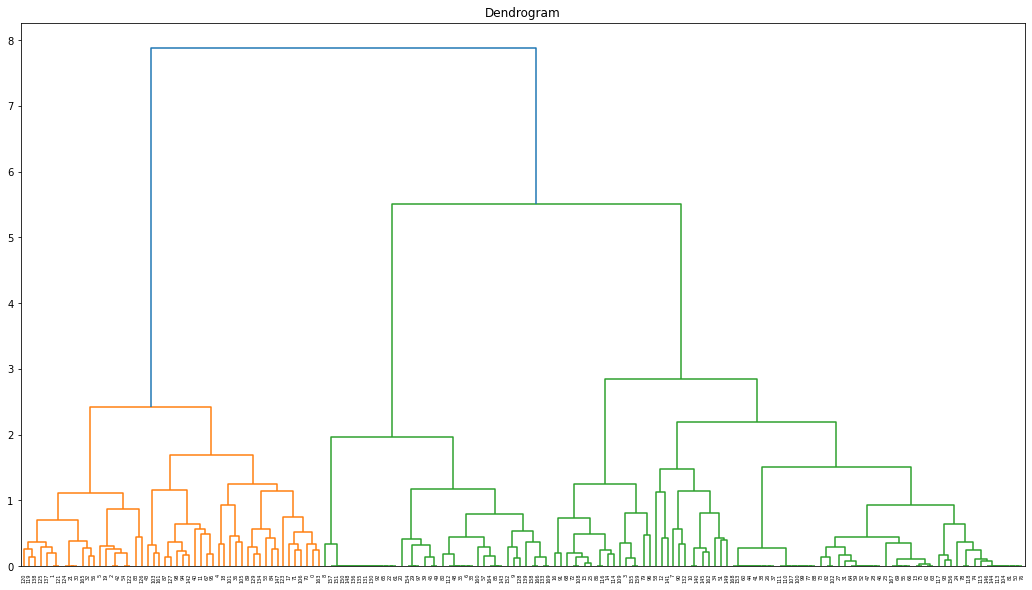

In [1]:
# Your code
import pandas as pd
from scipy.spatial.distance import pdist
from scipy.cluster.hierarchy import linkage, dendrogram
from matplotlib import pyplot as plt
from sklearn.preprocessing import normalize

df = pd.read_csv("sampled_data.csv", header=0)
df = df[['VegetationR', 'UseR', 'FishingR', 'RoadDistanceR', 'BuildingR', 'PollutionR']]
df = pd.DataFrame(normalize(df), columns=df.columns)
plt.figure(figsize=(18,10))
plt.title('Dendrogram')
dn = dendrogram(linkage(df, method = "ward"))

(b) What does the vertical and horizontal axis show in the dendogram? Why the distance between the clusters in the dendogram generally decreases, when we go from top to down in the dendogram?

Explanation: The vertical axis shows the distance or dissimilarity between clusters and the horizontal axis shows all the instances and clusters. The distance between the clusters in the dendogram generally decreases when we go from top to bottom because of the nature of the algorithm of agglomerative clustering. We start from the bottom with each point in cluster of its own, we find the closest pair of clusters and merge them. Eventually after repeating the process and and going towards top the distance between the clusters keep on increasing.

(c) Split the diagram at 3 and find the number the clusters at this point.

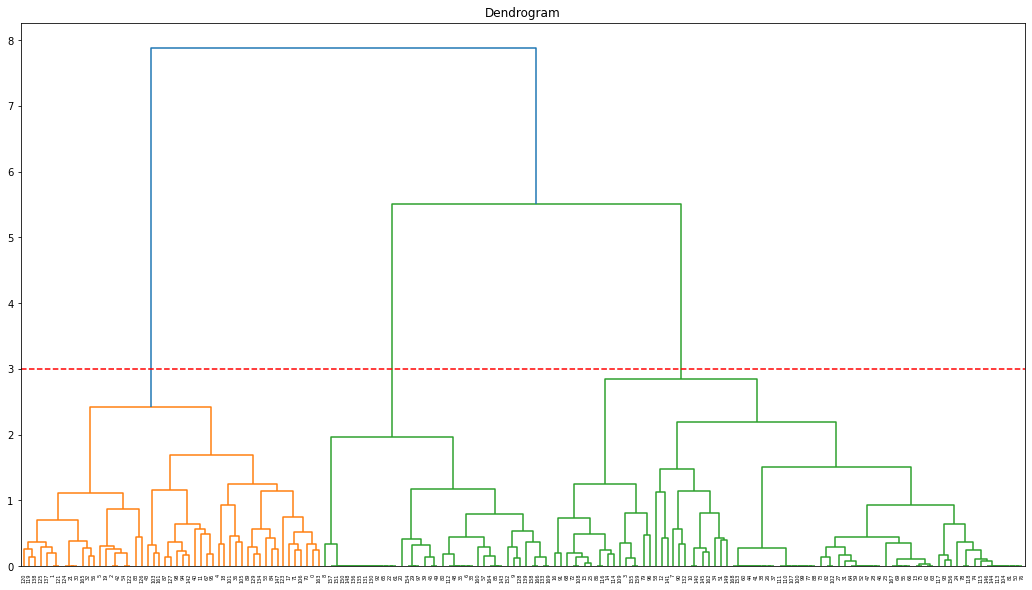

In [2]:
# Your code
plt.figure(figsize=(18,10))
plt.title('Dendrogram')
dn = dendrogram(linkage(df, method  = "ward"))
plt.axhline(y=3, color='r', linestyle='--')
plt.show()

Explanation: We can see from the figure above that the dashed line is splitting the dendrogram at 3 points. So we shall consider the number of clusters to be 3.

(d) Using agglomerative clustering with the number of clusters found in the previous section and a scatter diagram, show the discovered cluster for "VegetationR" and "UseR" in different colors. 

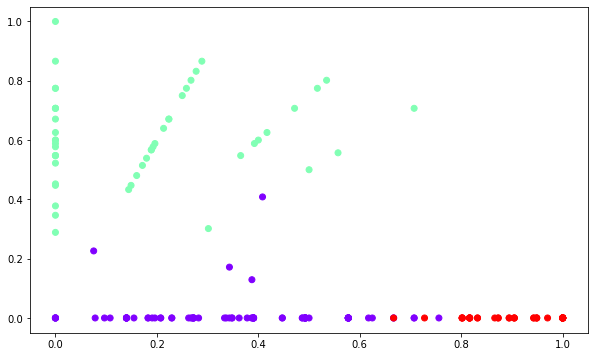

In [3]:
# Your code
from sklearn.cluster import AgglomerativeClustering
cluster = AgglomerativeClustering(n_clusters=3, affinity='euclidean', linkage='ward')  
cluster.fit_predict(df)
plt.figure(figsize=(10, 6))  
plt.scatter(df['VegetationR'], df['UseR'], c=cluster.labels_, cmap='rainbow')
plt.show()